In [1]:
import fastf1 as ff1
from fastf1 import plotting
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Enable the cache
ff1.Cache.enable_cache('cache') 

plotting.setup_mpl()

In [4]:
# select race
race = ff1.get_session(2022, 'Belgian Grand Prix', 'R')
race.load()

core           INFO 	Loading data for Belgian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/home/tanush/miniconda3/envs/f1/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/home/tanush/miniconda3/envs/f1/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=

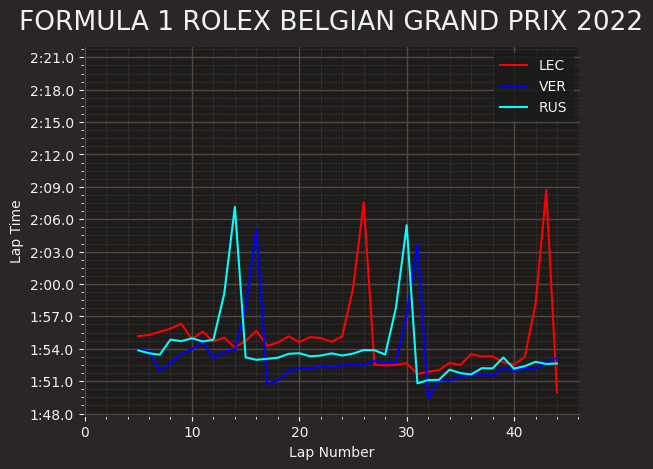

In [24]:
# select drivers
lec = race.laps.pick_driver('LEC')
ver = race.laps.pick_driver('VER')
rus = race.laps.pick_driver('RUS')

event_name = race.event.OfficialEventName

# plot
fig, ax = plt.subplots()
ax.plot(lec['LapNumber'], lec['LapTime'], color='red', label='LEC')
ax.plot(ver['LapNumber'], ver['LapTime'], color='blue', label='VER')
ax.plot(rus['LapNumber'], rus['LapTime'], color='cyan', label='RUS')
ax.set_title(f"{event_name}")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.legend()
plt.show()